In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

spy_df = pd.read_csv("../../data/finance/csv_files/monthly_spy_data.csv")
spy_df['Date'] = pd.to_datetime(spy_df['Date'])
spy_df['year'] = spy_df['Date'].dt.year
spy_df['month'] = spy_df['Date'].dt.month
spy_df_extracted = spy_df[['year', 'month', 'Close']]

crime_df = pd.read_csv("../../data/crime/monthly_crime.csv")
total_crime_extracted = crime_df[['year', 'month', 'violent_crime', 'homicide', 'robbery', 'aggravated_assault', 'property_crime', 'burglary','motor_vehicle_theft','rape']]

merged_df_spy = pd.merge(total_crime_extracted, spy_df_extracted, on=['year', 'month'], how='inner')

#scaler = MinMaxScaler()
features_df1 = merged_df_spy.iloc[:, :-1]
#features_scaled = scaler.fit_transform(features)

#normalizer = Normalizer()
n_bins = 4
labels = ['Bin1', 'Bin2', 'Bin3', 'Bin4']
target = merged_df_spy.iloc[:, -1:]
target['Close'] = pd.qcut(merged_df_spy["Close"],n_bins)

print(target['Close'].unique())

target['Close'] = pd.qcut(merged_df_spy["Close"],n_bins, labels=labels)

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical labels into numerical format
target['Close']  = label_encoder.fit_transform(target['Close'] )

#target = normalizer.fit_transform(target)

/Users/rohaneshwar/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


[(75.979, 132.13], (132.13, 189.175], (189.175, 273.7], (273.7, 466.405]]
Categories (4, interval[float64, right]): [(75.979, 132.13] < (132.13, 189.175] < (189.175, 273.7] < (273.7, 466.405]]


/Users/rohaneshwar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rohaneshwar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rohaneshwar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [4]:
merged_df_spy

,year,month,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,motor_vehicle_theft,rape,Close
0,2005,10,4457,53,1337,2763,32611,6908,3961,302,118.763750
1,2005,11,4457,53,1337,2763,32611,6908,3961,302,124.033809
2,2005,12,4457,53,1337,2763,32611,6908,3961,302,126.317143
3,2006,1,4599,55,1439,2801,32114,7035,3840,302,127.809000
4,2006,2,4599,55,1439,2801,32114,7035,3840,302,127.767370
...,...,...,...,...,...,...,...,...,...,...,...
202,2022,8,4066,67,706,2865,20877,2882,3019,427,415.121306
203,2022,9,4066,67,706,2865,20877,2882,3019,427,384.234288
204,2022,10,4066,67,706,2865,20877,2882,3019,427,371.559524
205,2022,11,4066,67,706,2865,20877,2882,3019,427,391.115239


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(features_scaled)
features_scaled = pca.transform(features_scaled)

NameError: name 'features_scaled' is not defined

In [6]:
features = ["violent_crime","homicide","aggravated_assault","burglary","property_crime","robbery","motor_vehicle_theft","rape"]
features_df = merged_df_spy[features]
features_df.head()

,violent_crime,homicide,aggravated_assault,burglary,property_crime,robbery,motor_vehicle_theft,rape
0,4457,53,2763,6908,32611,1337,3961,302
1,4457,53,2763,6908,32611,1337,3961,302
2,4457,53,2763,6908,32611,1337,3961,302
3,4599,55,2801,7035,32114,1439,3840,302
4,4599,55,2801,7035,32114,1439,3840,302


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.2)

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

target_values = ['Bin1', 'Bin2', 'Bin3', 'Bin4']

# Step 6: Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-Score:", f1)

Accuracy: 0.9285714285714286
F1-Score: 0.9297906602254429


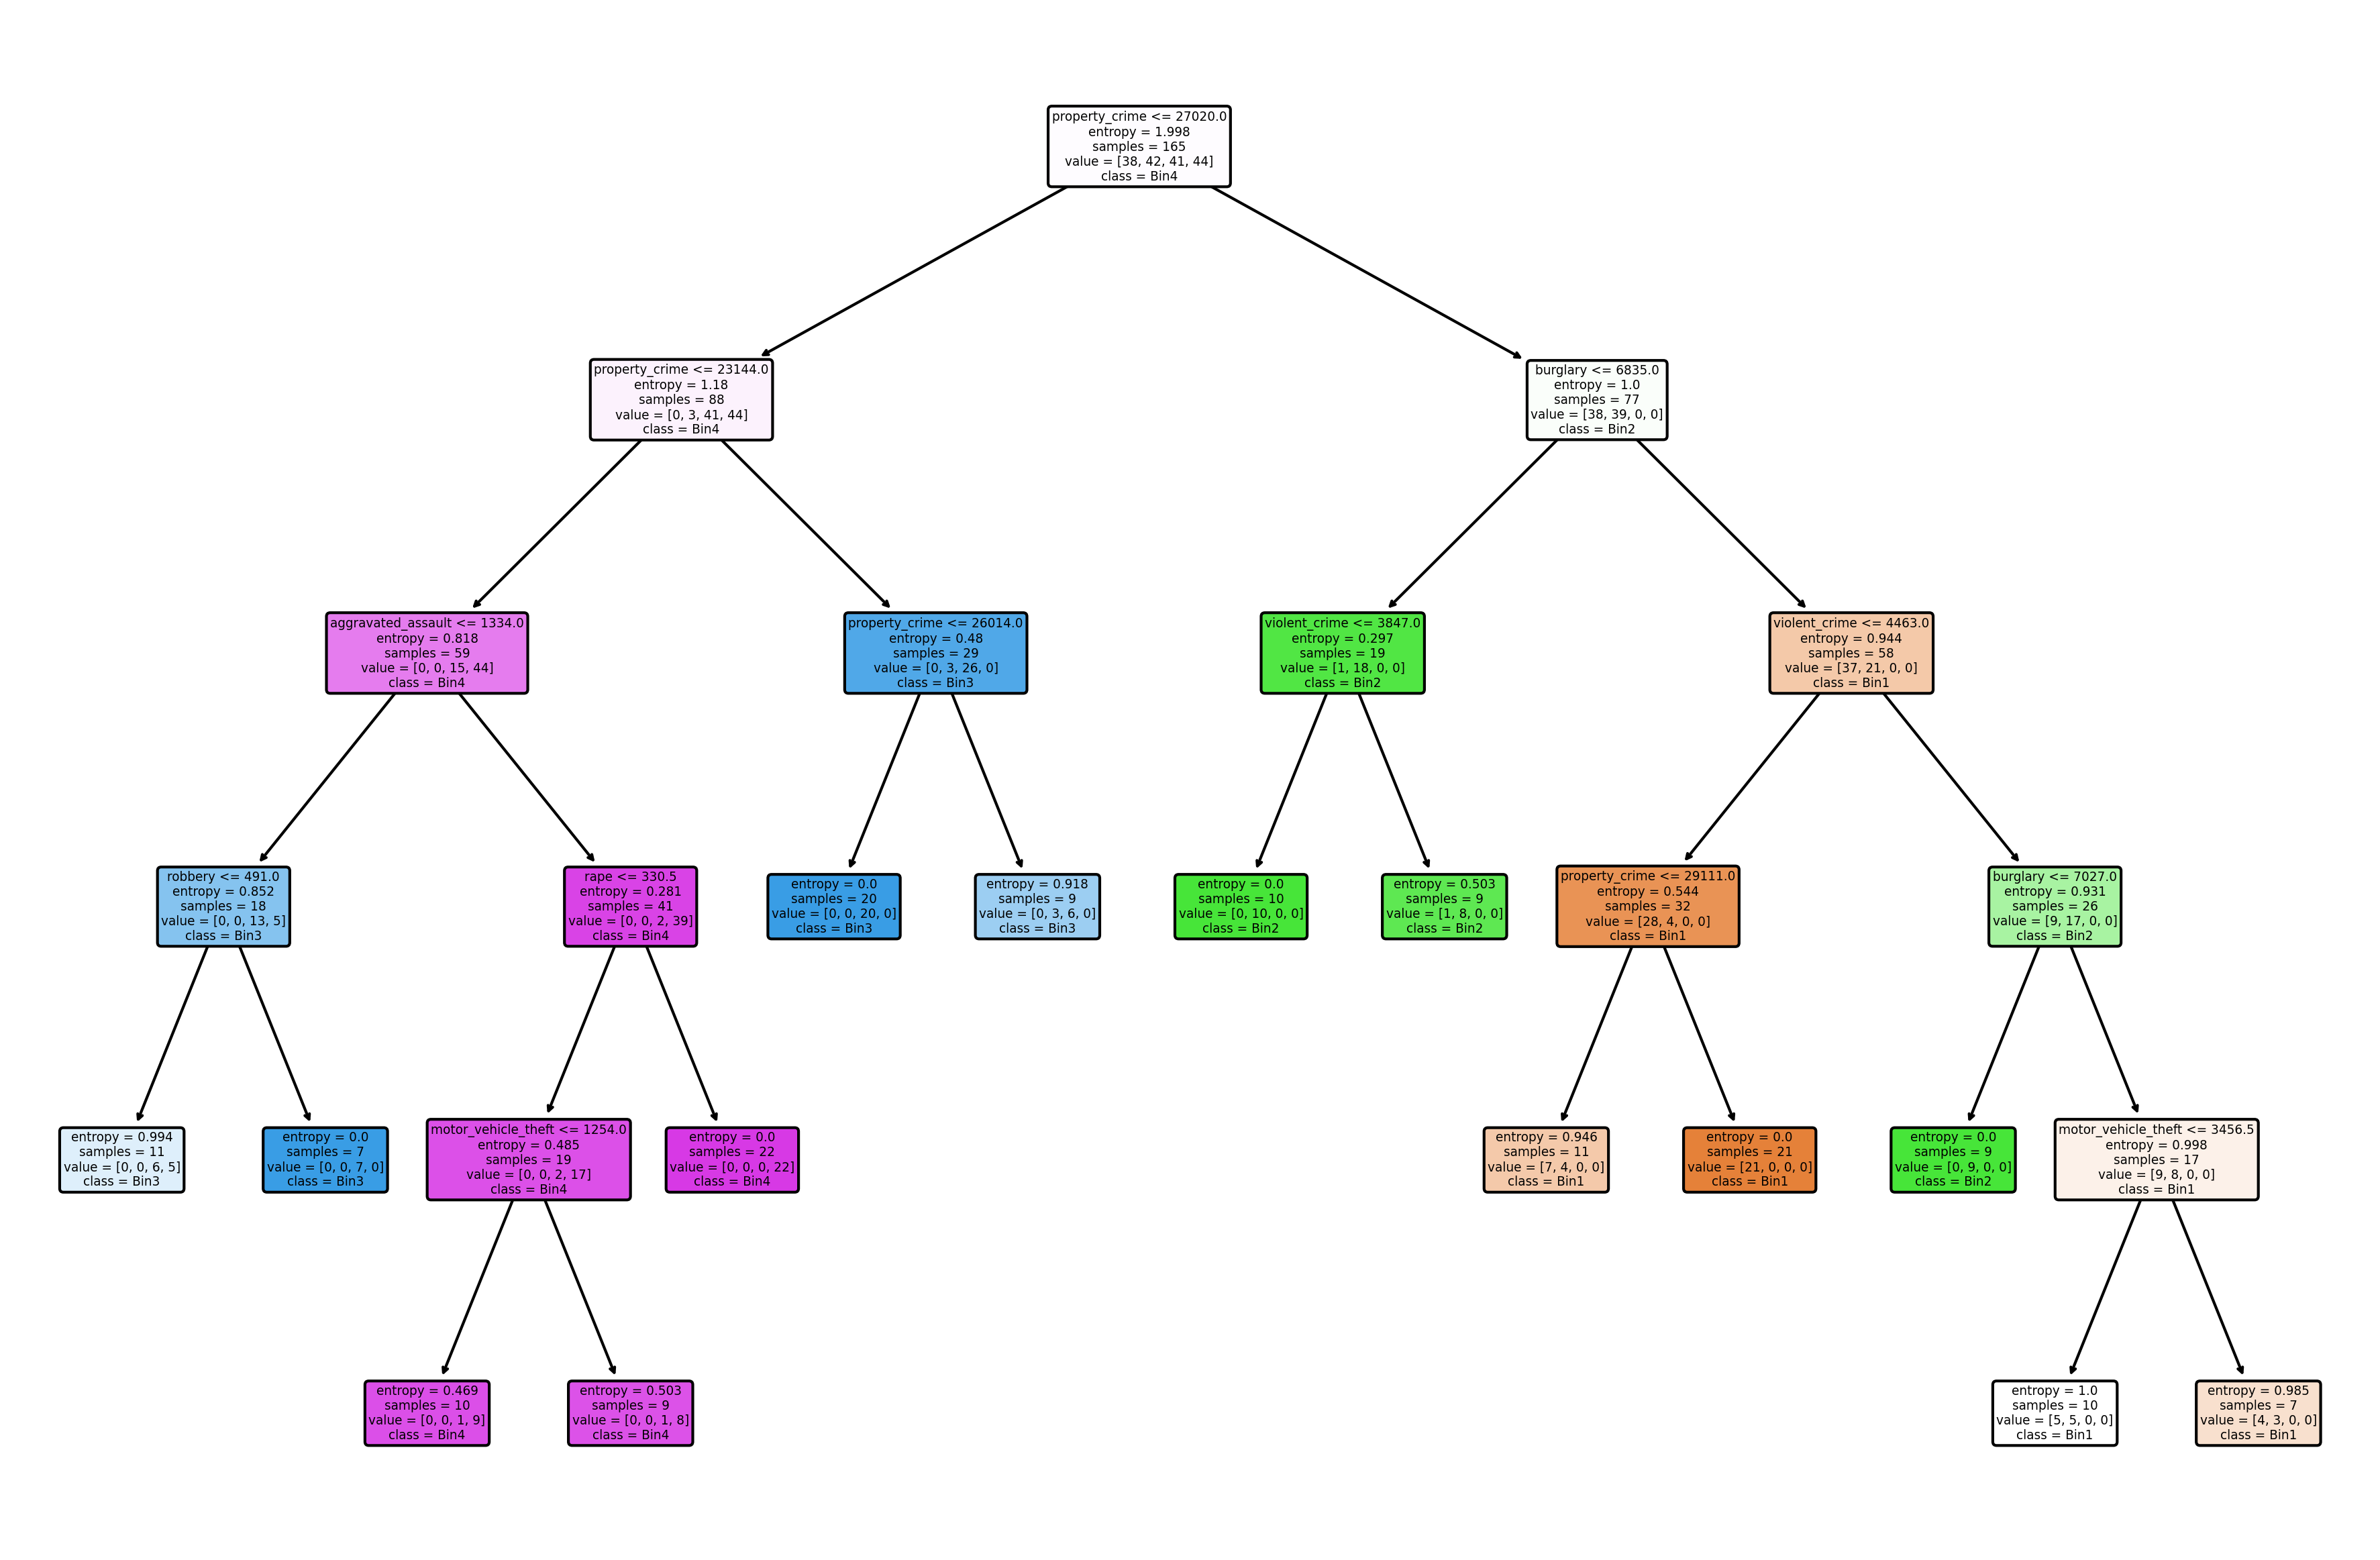

In [8]:
# Plot the decision tree
plt.figure(figsize=(15, 10), dpi=300)
plot_tree(dt_classifier, feature_names=features, class_names=target_values, filled=True, rounded=True)
plt.show()

In [9]:
num_folds = 5


#X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.2)

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

target_values = ['Bin1', 'Bin2', 'Bin3', 'Bin4']

# Calculate cross-validated accuracy and F1-score
accuracy_scores = cross_val_score(dt_classifier, features_df, target, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(dt_classifier, features_df, target, cv=cv, scoring='f1_weighted')

# Display average scores
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average F1-Score:", np.mean(f1_scores))

Average Accuracy: 0.8645760743321718
Average F1-Score: 0.8595870026149217


In [ ]:
num_folds = 5


#X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.2)

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

target_values = ['Bin1', 'Bin2', 'Bin3', 'Bin4']

# Calculate cross-validated accuracy and F1-score
accuracy_scores = cross_val_score(dt_classifier, features_df, target, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(dt_classifier, features_df, target, cv=cv, scoring='f1_weighted')

# Display average scores
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average F1-Score:", np.mean(f1_scores))

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

/Users/rohaneshwar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


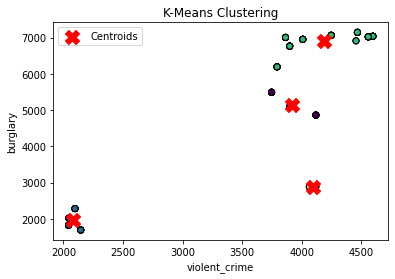

In [103]:
clustering_df = features_df[["violent_crime","burglary"]]
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to your data
kmeans.fit(clustering_df)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add cluster labels to the DataFrame (optional)
clustering_df['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(clustering_df['violent_crime'], clustering_df['burglary'], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('violent_crime')
plt.ylabel('burglary')
plt.legend()
plt.show()